In [334]:
import pandas as pd
import string
import nltk
import numpy as np

In [258]:
category_list = []
message_list = []

with open('./data/SMSSpamCollection') as f:
    for line in f:
        row = line.split('\t', maxsplit=1)
        category_list.append(row[0])
        message_list.append(row[1])

dict = {'Category': category_list, 'Message': message_list}
df = pd.DataFrame(data=dict)
df['Category'] = df['Category'].replace(['ham', 'spam'], [0, 1])
df

/var/folders/4s/pf1zdv_x4_qcflpq4m943q0m0000gn/T/ipykernel_91514/4088057831.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace(['ham', 'spam'], [0, 1])


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...\n
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?\n
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [259]:
df['Category'].value_counts()

Category
0    4827
1     747
Name: count, dtype: int64

In [260]:
df['Category'].value_counts(normalize=True)

Category
0    0.865985
1    0.134015
Name: proportion, dtype: float64

In [261]:
new_spam_df = pd.read_csv('./data/spam-text-messages.txt')
new_spam_df = new_spam_df.drop(columns=['message_id']).rename(columns={"message_text": "Message", "spam_label" : "Category"})
df = pd.concat([new_spam_df, df])
df['Category'].value_counts()

Category
0    4827
1     947
Name: count, dtype: int64

## Text Preprossessing

In [262]:
df_cleaning = df.copy()

In [263]:
df_cleaning['lower_message'] = df_cleaning['Message'].str.lower()
df_cleaning

,Message,Category,lower_message
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in..."
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s..."
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...


In [264]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_cleaning['message_wo_punct'] = df_cleaning["lower_message"].apply(lambda text: remove_punctuation(text))
df_cleaning

,Message,Category,lower_message,message_wo_punct
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...


In [265]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_cleaning['message_no_stopwords'] = df_cleaning['message_wo_punct'].apply(lambda text: remove_stopwords(text))
df_cleaning

,Message,Category,lower_message,message_wo_punct,message_no_stopwords
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...,urgent mobile number 500000 prize draw call cl...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...,congratulations youve selected free iphone 14 ...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...,package delivery 8742 pending update delivery ...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...,netflix account suspended update payment info ...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...,50 fashion world limited time offer shop fwsal...
...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...


In [266]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split(), lang='eng')
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_cleaning['message_lemmatized'] = df_cleaning['message_no_stopwords'].apply(lambda text: lemmatize_words(text))
df_cleaning

,Message,Category,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...,urgent mobile number 500000 prize draw call cl...,urgent mobile number 500000 prize draw call cl...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...,congratulations youve selected free iphone 14 ...,congratulation youve select free iphone 14 cli...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...,package delivery 8742 pending update delivery ...,package delivery 8742 pending update delivery ...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...,netflix account suspended update payment info ...,netflix account suspend update payment info ne...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...,50 fashion world limited time offer shop fwsal...,50 fashion world limit time offer shop fwsales...
...,...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time try 2 contact u u £750 pound prize 2 ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home,ü b go esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestion
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,guy bitch act like id interested buying someth...


In [267]:
df_cleaning['Category'] = df_cleaning['Category'].replace(['ham', 'spam'], [0, 1])
df_cleaning

,Message,Category,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...,urgent mobile number 500000 prize draw call cl...,urgent mobile number 500000 prize draw call cl...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...,congratulations youve selected free iphone 14 ...,congratulation youve select free iphone 14 cli...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...,package delivery 8742 pending update delivery ...,package delivery 8742 pending update delivery ...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...,netflix account suspended update payment info ...,netflix account suspend update payment info ne...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...,50 fashion world limited time offer shop fwsal...,50 fashion world limit time offer shop fwsales...
...,...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time try 2 contact u u £750 pound prize 2 ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home,ü b go esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestion
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,guy bitch act like id interested buying someth...


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_cleaning['message_lemmatized'], df_cleaning['Category'], test_size=.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape (number of strings, number of unique words):")
print(X_train_tfidf.shape)
print('List of unique words:')
print(tfidf_vectorizer.get_feature_names_out())
print("Vector Matrix for training data:")
print(X_train_tfidf.toarray())

Shape (number of strings, number of unique words):
(4619, 7751)
List of unique words:
['008704050406' '0089my' '0121' ... 'zoe' 'zogtorius' 'üll']
Vector Matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [269]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(class_report_lr)

y_train_pred = lr_classifier.predict(X_train_tfidf)
class_report_train = classification_report(y_train, y_train_pred)
print("Train Data:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(class_report_train)

Test Data:
Accuracy: 0.9567099567099567
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       969
           1       0.98      0.75      0.85       186

    accuracy                           0.96      1155
   macro avg       0.97      0.87      0.91      1155
weighted avg       0.96      0.96      0.95      1155

Train Data:
Accuracy: 0.957350075773977
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3858
           1       0.99      0.75      0.85       761

    accuracy                           0.96      4619
   macro avg       0.97      0.87      0.91      4619
weighted avg       0.96      0.96      0.95      4619



In [270]:
from sklearn.metrics import roc_curve, auc

y_score = lr_classifier.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)
print(y_score)

[-2.35491832 -2.58679355 -1.94767577 ...  0.714711   -1.90918222
 -3.89233888]


Test Data:


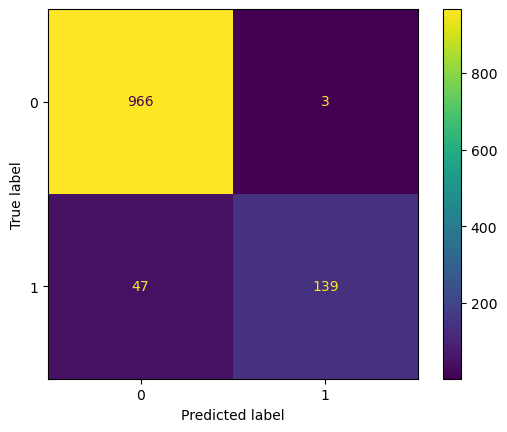

In [271]:
print("Test Data:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train Data:


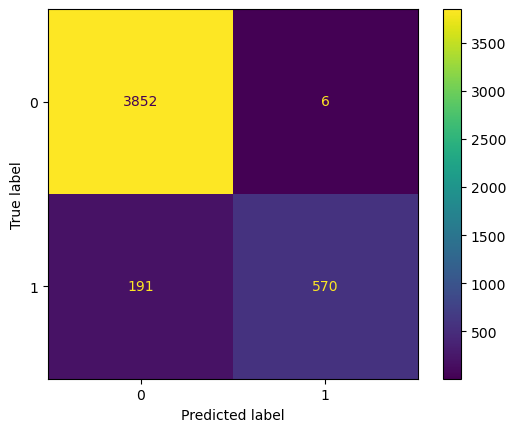

In [272]:
print("Train Data:")
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [273]:
""" from imblearn.over_sampling import RandomOverSampler

X = df_cleaning[['message_lemmatized']]
y = df_cleaning['Category']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()
df_balanced.head """

" from imblearn.over_sampling import RandomOverSampler\n\nX = df_cleaning[['message_lemmatized']]\ny = df_cleaning['Category']\n\noversampler = RandomOverSampler(random_state=42)\n\nX_resampled, y_resampled = oversampler.fit_resample(X, y)\n\ndf_balanced = pd.DataFrame(X_resampled, columns=X.columns)\ndf_balanced['label'] = y_resampled\n\ndf_balanced['label'].value_counts()\ndf_balanced.head "

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(df_cleaning['message_lemmatized'], df_cleaning['Category'], test_size=.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape (number of strings, number of unique words):")
print(X_train_tfidf.shape)
print('List of unique words:')
print(tfidf_vectorizer.get_feature_names_out())
print("Vector Matrix for training data:")
print(X_train_tfidf.toarray())

Shape (number of strings, number of unique words):
(4619, 7751)
List of unique words:
['008704050406' '0089my' '0121' ... 'zoe' 'zogtorius' 'üll']
Vector Matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [313]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=.5)
X_oversamp, y_oversamp = sm.fit_resample(X_train_tfidf, y_train)
print(y_oversamp.value_counts())
X_oversamp.shape

Category
0    3858
1    1929
Name: count, dtype: int64


(5787, 7751)

In [314]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_oversamp, y_oversamp)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Test Data:")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(class_report_lr)

y_train_pred = lr_classifier.predict(X_oversamp)
class_report_train = classification_report(y_oversamp, y_train_pred)
print("Train Data:")
print("Accuracy: ", accuracy_score(y_oversamp, y_train_pred))
print(class_report_train)

Test Data:
Accuracy:  0.9748917748917749
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       969
           1       0.96      0.88      0.92       186

    accuracy                           0.97      1155
   macro avg       0.97      0.94      0.95      1155
weighted avg       0.97      0.97      0.97      1155

Train Data:
Accuracy:  0.9820286849835839
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3858
           1       0.99      0.96      0.97      1929

    accuracy                           0.98      5787
   macro avg       0.98      0.98      0.98      5787
weighted avg       0.98      0.98      0.98      5787



Test Data:


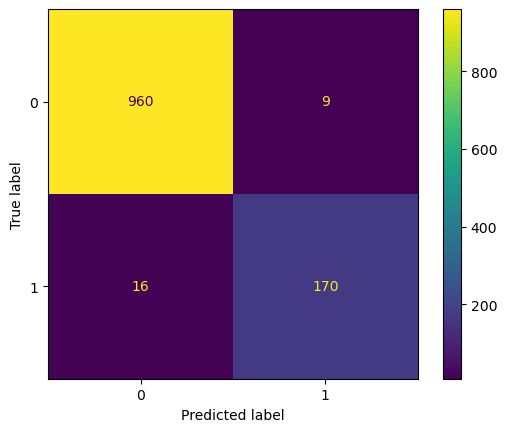

In [277]:
print("Test Data:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train Data:


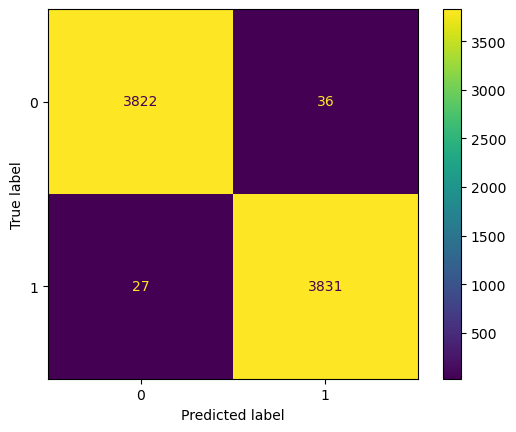

In [282]:
print("Train Data:")
cm = confusion_matrix(y_oversamp, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Let's wrap our models in a function so that we will be able to perform hyperparameter tuning easily

In [283]:
def baseline_model(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe['message_lemmatized'], dataframe['Category'], test_size=.2, random_state=42)

    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train_tfidf, y_train)

    y_pred_lr = lr_classifier.predict(X_test_tfidf)

    return accuracy_score(y_test, y_pred_lr)


In [348]:
def lr_with_oversampling(dataframe, sample_ratio=1, c_value=1, custom_min_df=1):
    X_train, X_test, y_train, y_test = train_test_split(dataframe['message_lemmatized'], dataframe['Category'], test_size=.2, random_state=42)

    tfidf_vectorizer = TfidfVectorizer(min_df=custom_min_df)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    sm = SMOTE(random_state=42, sampling_strategy=sample_ratio)
    X_oversamp, y_oversamp = sm.fit_resample(X_train_tfidf, y_train)

    logreg = LogisticRegression(random_state=42, max_iter=10000, C=c_value)
    logreg.fit(X_oversamp, y_oversamp)

    y_pred_lr = logreg.predict(X_test_tfidf)

    return accuracy_score(y_test, y_pred_lr)

In [349]:
ratio_list = [.3, .4, .5, .6, .7, .8, .9, 1.0]
print("Testing different oversampling ratios:")
default = lr_with_oversampling(df_cleaning)
print(f"Default oversampling method accuracy (1:1): {default}")
for ratio in ratio_list:
    acc = lr_with_oversampling(df_cleaning, sample_ratio=ratio)
    print(f"Ratio {ratio} Accuracy: {acc}")

Testing different oversampling ratios:
Default oversampling method accuracy (1:1): 0.9783549783549783
Ratio 0.3 Accuracy: 0.9645021645021645
Ratio 0.4 Accuracy: 0.9731601731601731
Ratio 0.5 Accuracy: 0.9748917748917749
Ratio 0.6 Accuracy: 0.974025974025974
Ratio 0.7 Accuracy: 0.9766233766233766
Ratio 0.8 Accuracy: 0.9774891774891775
Ratio 0.9 Accuracy: 0.9766233766233766
Ratio 1.0 Accuracy: 0.9783549783549783


In [345]:
ratio_list = [.7, .75, .8, .85, .9, .95, 1]
print("Testing different oversampling ratios:")
for ratio in ratio_list:
    acc = lr_with_oversampling(df_cleaning, sample_ratio=ratio)
    print(f"Ratio {ratio} Accuracy: {acc}")

Testing different oversampling ratios:
Ratio 0.7 Accuracy: 0.9766233766233766
Ratio 0.75 Accuracy: 0.9774891774891775
Ratio 0.8 Accuracy: 0.9774891774891775
Ratio 0.85 Accuracy: 0.9766233766233766
Ratio 0.9 Accuracy: 0.9766233766233766
Ratio 0.95 Accuracy: 0.9766233766233766
Ratio 1 Accuracy: 0.9783549783549783


In [331]:
c_list = [10e-3, 10e-2, 1, 10, 100, 10e2, 10e3, 10e4]
print("Testing different C values:")

for c in c_list:
    acc = lr_with_oversampling(df_cleaning, c_value=c)
    print(f"C value = {c} accuracy: {acc}")

Testing different C values:
C value = 0.01 accuracy: 0.9532467532467532
C value = 0.1 accuracy: 0.9653679653679653
C value = 1 accuracy: 0.9783549783549783
C value = 10 accuracy: 0.9809523809523809
C value = 100 accuracy: 0.9800865800865801
C value = 1000.0 accuracy: 0.9800865800865801
C value = 10000.0 accuracy: 0.9800865800865801
C value = 100000.0 accuracy: 0.9800865800865801


In [342]:
c_list = np.linspace(1, 100, 100).tolist()
print("Testing different C values:")
acc_list = []

for c in c_list:
    acc = lr_with_oversampling(df_cleaning, c_value=c)
    acc_list.append(acc)
    print(f"C value = {c} accuracy: {acc}")

print(f"Best accuracy: {max(acc_list)} at c-value {acc_list.index(max(acc_list)) + 1}")

Testing different C values:
C value = 1.0 accuracy: 0.9783549783549783
C value = 2.0 accuracy: 0.9792207792207792
C value = 3.0 accuracy: 0.9792207792207792
C value = 4.0 accuracy: 0.9783549783549783
C value = 5.0 accuracy: 0.9792207792207792
C value = 6.0 accuracy: 0.9800865800865801
C value = 7.0 accuracy: 0.9809523809523809
C value = 8.0 accuracy: 0.9809523809523809
C value = 9.0 accuracy: 0.9809523809523809
C value = 10.0 accuracy: 0.9809523809523809
C value = 11.0 accuracy: 0.9809523809523809
C value = 12.0 accuracy: 0.9809523809523809
C value = 13.0 accuracy: 0.9809523809523809
C value = 14.0 accuracy: 0.9818181818181818
C value = 15.0 accuracy: 0.9809523809523809
C value = 16.0 accuracy: 0.9809523809523809
C value = 17.0 accuracy: 0.9809523809523809
C value = 18.0 accuracy: 0.9818181818181818
C value = 19.0 accuracy: 0.9818181818181818
C value = 20.0 accuracy: 0.9792207792207792
C value = 21.0 accuracy: 0.9792207792207792
C value = 22.0 accuracy: 0.9792207792207792
C value = 23.

Here, we can see that the best c-value is 14

Let's tune the min_df parameter of TdidfVectorizer

In [352]:
mindf_list = [1, 2, 3, 4, 5, 10, 20, 50]
print("Testing different C values:")
acc_list = []

for mindf in mindf_list:
    acc = lr_with_oversampling(df_cleaning, custom_min_df=mindf)
    acc_list.append(acc)
    print(f"min_df value = {mindf} accuracy: {acc}")

Testing different C values:
min_df value = 1 accuracy: 0.9783549783549783
min_df value = 2 accuracy: 0.9766233766233766
min_df value = 3 accuracy: 0.9774891774891775
min_df value = 4 accuracy: 0.974025974025974
min_df value = 5 accuracy: 0.974025974025974
min_df value = 10 accuracy: 0.9246753246753247
min_df value = 20 accuracy: 0.9506493506493506
min_df value = 50 accuracy: 0.9177489177489178


# Using a more modern data set to test the model

We created a set of 593 more modern text messages using Claude AI to test the model.

In [354]:
modern_spam_df = pd.read_csv('./data/spam_sms_dataset.csv')
modern_spam_df['label'].value_counts()

label
spam    297
ham     296
Name: count, dtype: int64

In [355]:
modern_spam_df['label'] = modern_spam_df['label'].replace(['ham', 'spam'], [0, 1])
modern_spam_df['lower_message'] = modern_spam_df['message'].str.lower()
modern_spam_df['message_wo_punct'] = modern_spam_df["lower_message"].apply(lambda text: remove_punctuation(text))
modern_spam_df['message_no_stopwords'] = modern_spam_df['message_wo_punct'].apply(lambda text: remove_stopwords(text))
modern_spam_df['message_lemmatized'] = modern_spam_df['message_no_stopwords'].apply(lambda text: lemmatize_words(text))
modern_spam_df

/var/folders/4s/pf1zdv_x4_qcflpq4m943q0m0000gn/T/ipykernel_91514/15539428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modern_spam_df['label'] = modern_spam_df['label'].replace(['ham', 'spam'], [0, 1])


,label,message,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,0,"Hey, are we still meeting for coffee tomorrow ...","hey, are we still meeting for coffee tomorrow ...",hey are we still meeting for coffee tomorrow at 3,hey still meeting coffee tomorrow 3,hey still meet coffee tomorrow 3
1,1,CONGRATULATIONS! You've WON a FREE iPhone 14! ...,congratulations! you've won a free iphone 14! ...,congratulations youve won a free iphone 14 cli...,congratulations youve free iphone 14 click cla...,congratulation youve free iphone 14 click clai...
2,0,Don't forget to pick up milk on your way home ...,don't forget to pick up milk on your way home ...,dont forget to pick up milk on your way home p...,dont forget pick milk way home please,dont forget pick milk way home please
3,1,URGENT: Your bank account has been suspended. ...,urgent: your bank account has been suspended. ...,urgent your bank account has been suspended ca...,urgent bank account suspended call immediately...,urgent bank account suspend call immediately 1...
4,0,The meeting has been moved to 2pm instead of 3...,the meeting has been moved to 2pm instead of 3...,the meeting has been moved to 2pm instead of 3...,meeting moved 2pm instead 3pm see,meet move 2pm instead 3pm see
...,...,...,...,...,...,...
588,1,FINAL WARNING: Your internet service will be d...,final warning: your internet service will be d...,final warning your internet service will be di...,final warning internet service disconnected to...,final warning internet service disconnect tomo...
589,0,Can you pick up the kids from daycare today? I...,can you pick up the kids from daycare today? i...,can you pick up the kids from daycare today im...,pick kids daycare today im stuck meeting,pick kid daycare today im stick meeting
590,1,EXCLUSIVE OFFER: Get 85% OFF designer handbags...,exclusive offer: get 85% off designer handbags...,exclusive offer get 85 off designer handbags l...,exclusive offer get 85 designer handbags limit...,exclusive offer get 85 designer handbag limit ...
591,0,Don't forget to call mom for her birthday tomo...,don't forget to call mom for her birthday tomo...,dont forget to call mom for her birthday tomorrow,dont forget call mom birthday tomorrow,dont forget call mom birthday tomorrow


In [356]:
modern_spam_test = tfidf_vectorizer.transform(modern_spam_df['message_lemmatized'])

In [357]:
modern_pred = lr_classifier.predict(modern_spam_test)

print(accuracy_score(modern_spam_df['label'], modern_pred))

0.8870151770657673


Using the existing model that we trained previously, we can see that it does not perform as well on data with more modern SMS messages.